In [1]:
%matplotlib notebook

In [2]:
#Does price affect rating
# h0 = price has no affect on rating
from scipy import stats
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yelpapi import YelpAPI
from yelp.client import Client
from config import api_key

In [3]:
#API Call
my_api_key = api_key
client = YelpAPI(my_api_key)

In [5]:
#pulling data from yelp
yelp_min = []

for i in range(0, 1000):
    response = client.search_query(location="Saint Paul", limit=1, offset=i)
    yelp_min.append(response["businesses"][0])

In [6]:
len(yelp_min)

1000

In [7]:
df = pd.DataFrame.from_dict(yelp_min)
df.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,caspers-and-runyons-nook-saint-paul,"[{'alias': 'divebars', 'title': 'Dive Bars'}, ...","{'latitude': 44.9265501, 'longitude': -93.1567...",(651) 698-4347,4210.692008,1qVOiuSGnldYG82YHq4S-w,https://s3-media2.fl.yelpcdn.com/bphoto/GgvZcl...,False,"{'address1': '492 Hamline Ave S', 'address2': ...",Casper's and Runyon's Nook,+16516984347,$$,4.5,818,[],https://www.yelp.com/biz/caspers-and-runyons-n...
1,the-happy-gnome-saint-paul,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 44.9462471008301, 'longitude': -9...",(651) 287-2018,1381.608414,dzm_FfWbQSxeBCZ67HR5IA,https://s3-media1.fl.yelpcdn.com/bphoto/3Nsuo1...,False,"{'address1': '498 Selby Ave', 'address2': None...",The Happy Gnome,+16512872018,$$,4.0,668,[],https://www.yelp.com/biz/the-happy-gnome-saint...
2,tongue-in-cheek-saint-paul,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 44.971004486084, 'longitude': -93...",(651) 888-6148,4346.905832,1VV8wL1WP28L4sZrZoueaQ,https://s3-media1.fl.yelpcdn.com/bphoto/kt-G99...,False,"{'address1': '989 Payne Ave', 'address2': None...",Tongue In Cheek,+16518886148,$$,4.5,343,[],https://www.yelp.com/biz/tongue-in-cheek-saint...
3,blue-door-pub-st-paul-saint-paul-2,"[{'alias': 'pubs', 'title': 'Pubs'}, {'alias':...","{'latitude': 44.946732, 'longitude': -93.176774}",(651) 493-1865,5598.330152,dMUv-dziQtYJ6Ca7q65XPw,https://s3-media1.fl.yelpcdn.com/bphoto/2c1Qal...,False,"{'address1': '1811 Selby Ave', 'address2': '',...",Blue Door Pub St. Paul,+16514931865,$$,4.0,715,[],https://www.yelp.com/biz/blue-door-pub-st-paul...
4,the-buttered-tin-saint-paul,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...","{'latitude': 44.9509974383045, 'longitude': -9...",(651) 224-2300,1881.311496,j0YvcUGr9VWsbvVpdLGUJA,https://s3-media1.fl.yelpcdn.com/bphoto/35-BIg...,False,"{'address1': '237 7th St E', 'address2': '', '...",The Buttered Tin,+16512242300,$$,4.0,462,[pickup],https://www.yelp.com/biz/the-buttered-tin-sain...


In [10]:
#parsing data for graph
graph_data = df[["price", "rating"]]
graph_data.head()

,price,rating
0,$$,4.5
1,$$,4.0
2,$$,4.5
3,$$,4.0
4,$$,4.0


In [11]:
#Cleaning parse
graph_data.count()
graph_data_clean = graph_data.dropna(how='any')
graph_data_clean.count()

price     948
rating    948
dtype: int64

In [12]:
graph_data_clean["price"].astype(str)

0       $$
1       $$
2       $$
3       $$
4       $$
5       $$
6       $$
7       $$
8      $$$
9       $$
10       $
11      $$
12      $$
13       $
14       $
15      $$
16       $
17      $$
18       $
19       $
20       $
21      $$
22      $$
23      $$
24      $$
25      $$
26       $
27       $
28      $$
29       $
      ... 
968      $
969     $$
970      $
971      $
972     $$
973      $
974      $
975     $$
976      $
977     $$
978     $$
980      $
981     $$
983     $$
984     $$
985     $$
986     $$
987    $$$
988     $$
989      $
990     $$
991     $$
992     $$
993     $$
994      $
995      $
996     $$
997      $
998      $
999     $$
Name: price, Length: 948, dtype: object

In [13]:
graph_data_clean['price_length'] = graph_data_clean['price'].apply(len)
graph_data_clean

C:\Users\titus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,price,rating,price_length
0,$$,4.5,2
1,$$,4.0,2
2,$$,4.5,2
3,$$,4.0,2
4,$$,4.0,2
5,$$,4.0,2
6,$$,4.0,2
7,$$,4.0,2
8,$$$,4.0,3
9,$$,4.5,2


In [14]:
new_df = graph_data_clean[['price_length', 'rating']]
new_df = new_df.rename(index=str, columns={"price_length": "price"})

In [15]:
new_df.head()

,price,rating
0,2,4.5
1,2,4.0
2,2,4.5
3,2,4.0
4,2,4.0


<IPython.core.display.Javascript object>


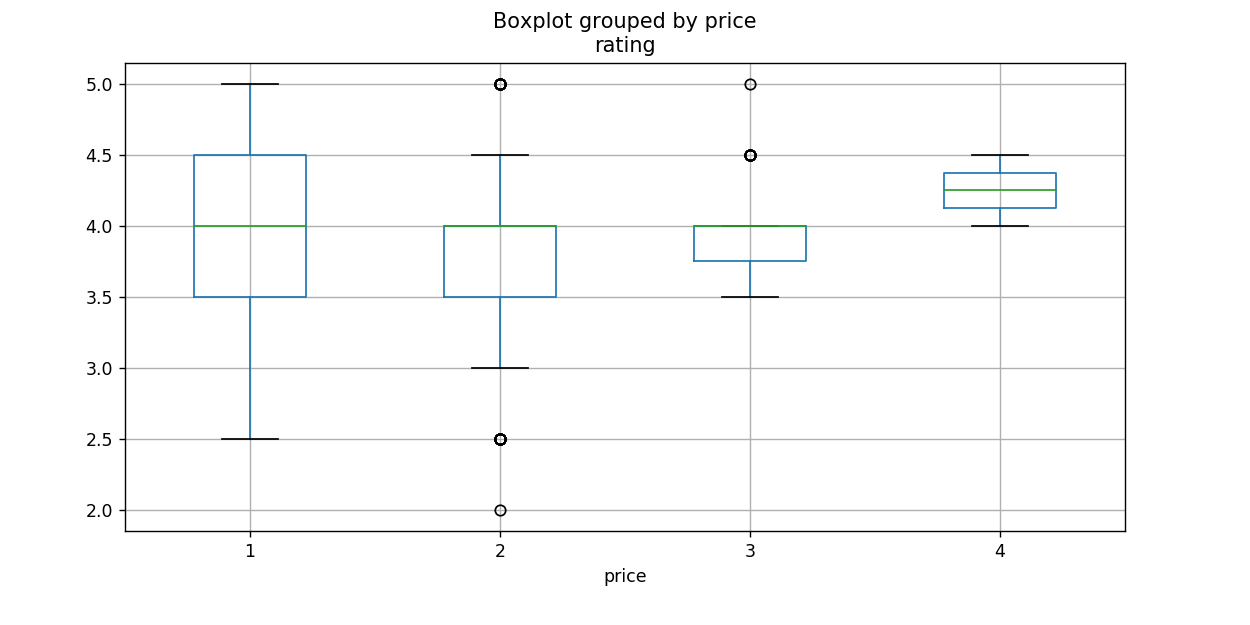

In [16]:
new_df.boxplot("rating", by="price", figsize=(10, 5))

In [17]:
group1 = new_df[new_df["price"] == 1]["rating"]
group2 = new_df[new_df["price"] == 2]["rating"]
group3 = new_df[new_df["price"] == 3]["rating"]
group4 = new_df[new_df["price"] == 4]["rating"]

stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=7.385650681591276, pvalue=6.802371940731888e-05)

In [18]:
price_counts = new_df["price"].value_counts()
price_counts

2    557
1    346
3     43
4      2
Name: price, dtype: int64

In [19]:
four_star = new_df[new_df['price']==4]
four_star.head()

,price,rating
276,4,4.0
316,4,4.5


<IPython.core.display.Javascript object>


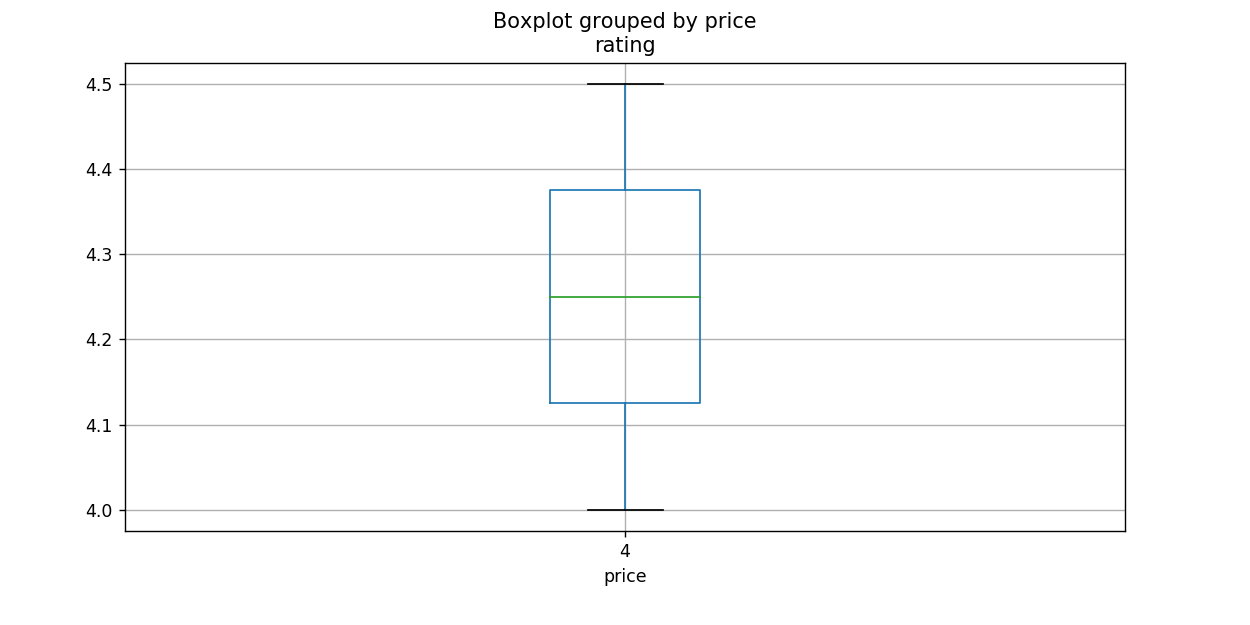

In [20]:
four_star.boxplot("rating", by="price", figsize=(10, 5))

<IPython.core.display.Javascript object>


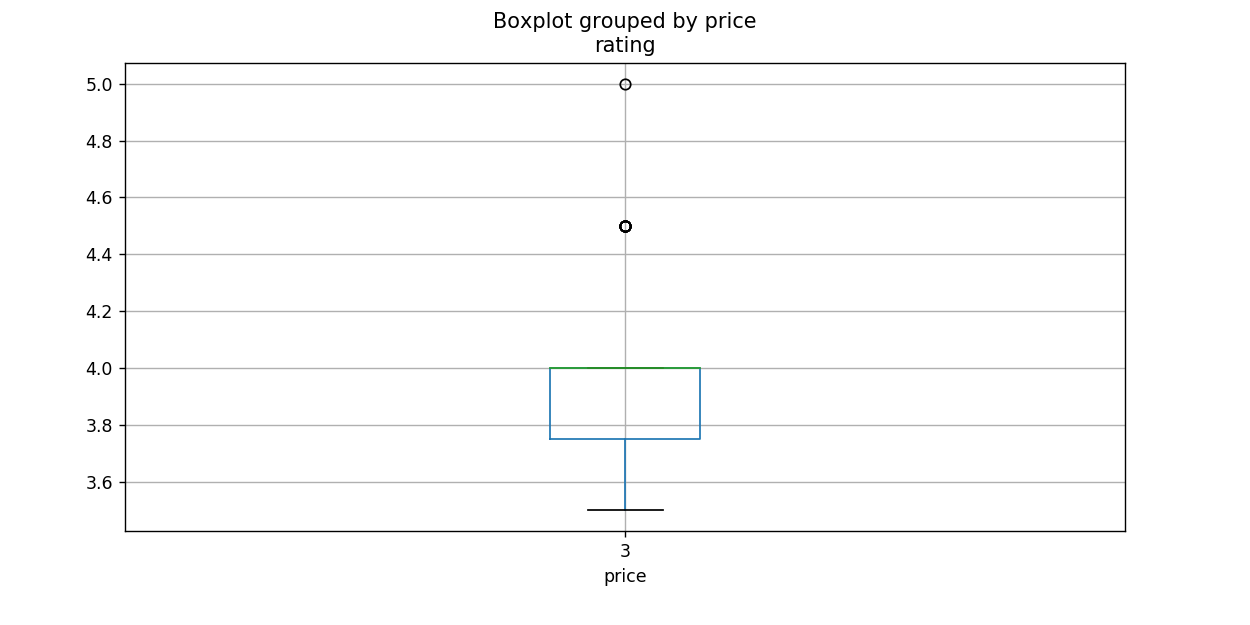

In [21]:
three_star = new_df[new_df['price']==3]
three_star.boxplot("rating", by="price", figsize=(10, 5))

<IPython.core.display.Javascript object>


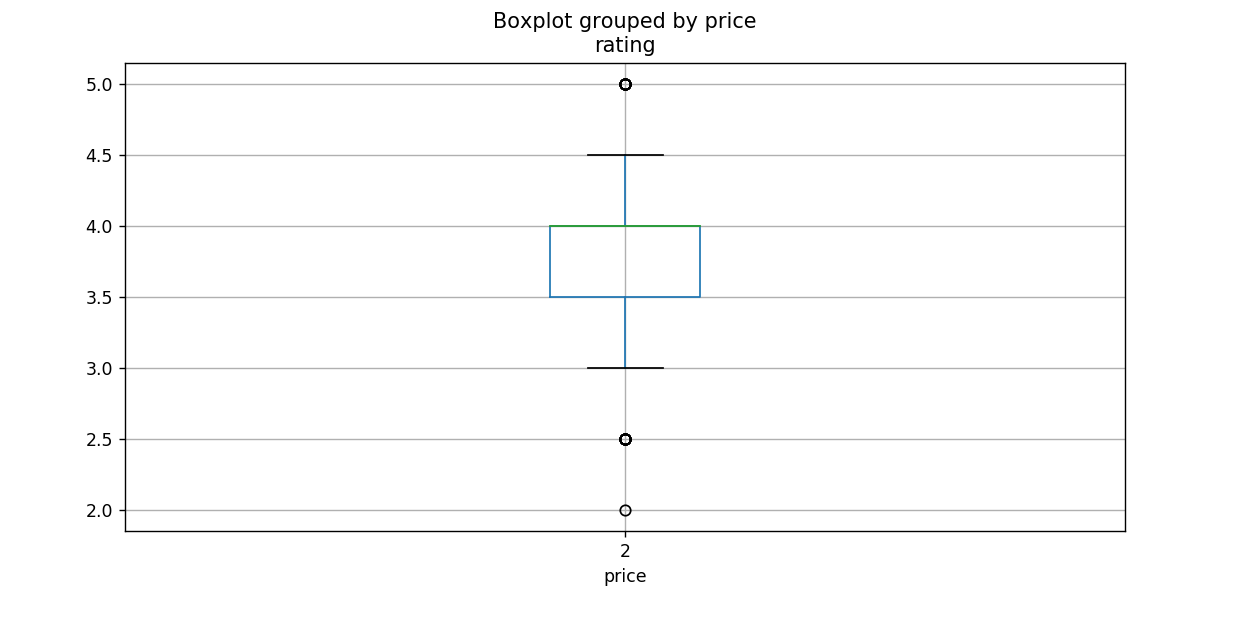

In [22]:
two_star = new_df[new_df['price']==2]
two_star.boxplot("rating", by="price", figsize=(10, 5))

<IPython.core.display.Javascript object>


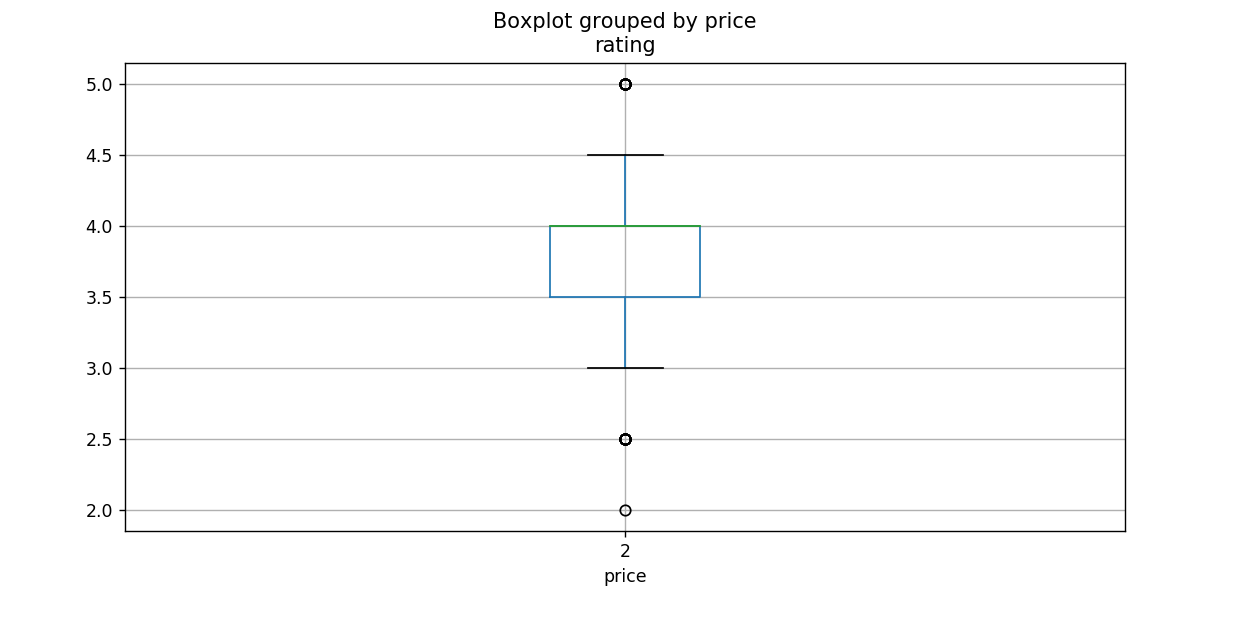

In [23]:
two_star = new_df[new_df['price']==2]
two_star.boxplot("rating", by="price", figsize=(10, 5))